# Assignment: Classification of Handwritten Digits

In this assignment, we will use the $k$-nearest neighbour classifier and a dense neural network (multilayer perceptron) to classify handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/).



## Working together

The assignment should be solved in **groups of two**. Copying code from other students, the Internet, or other sources is not allowed (the provided helper code excluded). If you want to work alone, you must have a compelling reason (that convinces us) for doing so.

## Task

You are given a dataset of images of handwritten digits (0 through 9) and the correct answers to train your machine learning models on.

You need to divide the images into a training data set, (optionally) a validation data set, and a test set. You may also use cross-validation instead of a validation data set.

After training, and after selecting the proper hyper-parameters (the number of neighbors, $k$, the number of layers, the number of neurons, *etc.*), classify the images in the test set to see how accurately your models classify unknown images. **Note**: You should *never* use, look at, or classify the test set until you have selected your final model. You are *not* allowed to continue training or do any model alterations after you have evaluated your models on the test data set.

**In order to pass the assignment your solution must correctly classify at least 94 % of the validation data set images with the k-NN model. The neural network should be trained on a smaller subset of the data, i.e. the approximately smallest amount of data with which it still is able to beat a k-NN model that is trained on 20.000 data points by a margin of 0.5 percentage points. Note that using a smaller dataset makes your life easier because it speeds up training.**

## What to hand in

You should hand in a complete and well-written report (in `pdf` format) together with your Jupyter notebook electronically in Labres. Only one member per group hands in and marks the other member. **Note**: you cannot change group members after the first hand-in, so make sure you do it correct the first time.

The report may be brief (try to keep it under 5 pages) but it is important that you fulfill the following requirements:

 * The report must have a title page including names and user names (@cs) for all group members, course name, and assignment name.
 * The report should be as short as possible and as long as necessary. If your report exceeds five pages (incl. the title page), chances are that you are doing something wrong.
 * Describe how your solution works on a level that does not lose interesting details. Divide the report into two parts (one for $k$-NN, the other for the neural network), and split each part into *implementation*, *results*, and *discussion* subsections.
   - Most important is that you describe how your solution works, and why you solved it in a particular way. Clearly state the ranges for your hyper-parameters, and explain why you chose those.
   - Explain, and give pseudo-code for your hyper-parameter search. Explain any decisions/choices you've made.
   - Note that the final accuracy that counts is 'test data accuracy' (for the neural network: the last line of the last cell in the notebook).
   - For both classifiers: one of the key tasks is running a grid search for k-NN (only based on different values for k) and for the ANN (for several (hyper)parameters). This means you need to wrap model fitting and evaluation into 'for'-loops! You need to write your own search, using out-of-the-box functions for this is not permitted.
   - For the neural network: plot how the loss evolve during training of your best model, and interpret the plot. The loss is available in the `MLPClassifier` after training.
   - For validation, you may do cross-validation and you may scale the features differently (during preprocessing), but these are not strict requirements.
   - Describe how your work went and which problems and issues you faced when developing the program.
   - Describe how you divided the work between you.
   - Use clear, well written English language.
   - You must not include your source code in the report, supply it in the Jupyter notebook.
   - **Report your validation and test scores, as well as the size of the dataset used for training the neural network, in the report.**

The source code should align to the following:

 * Comment the code in a reasonable way. Follow the [Docstring conventions](https://peps.python.org/pep-0257/). You do not have to remove the instructions when submitting your notebook, but you should clean up the inline comments and make sure your code is readable.
 * Structure your code in a suitable way, such that it is easy to follow what is going on.
 * Name classes, variables, methods, modules, *etc.*, such that the names clearly describe their function and follow the specifications given above.
 * The code you hand in should not contain sections that are not used, or unnecessary. Make sure that you understand every part of the code that you hand in.
 * **Important:** hand in a notebook that contains your execution results, i.e., execute the notebook from scratch (**Kernel** - **Re-start and run all**) and save before you hand in.

## Getting started

You can follow [these instructions](https://jupyter.org/install) to install Jupyter Notebook. Then, proceed as follows:

 - (Optional, or for troubleshooting). Install the following Python dependencies: `numpy`, `matplotlib`, and `sklearn`. While we try to have the dependencies installed directly in the Jupyter notebook, on some of the local machines, a manual install may be necessary. For this, use pip from your command line, see: https://pip.pypa.io/en/stable/cli/pip_install/. In some cases, `sklearn` may require the explicit installation of pandas.
 - Download this notebook.
 - Start Jupyter Notebook
 - Open your saved copy of this notebook

Alternatively, you can also use [Google Colab](https://colab.research.google.com/) to work on the assignment "in the cloud".

**Note**: If you take the course Artificial Intelligence in Cognitive Science (5DV201), then set the following variable to `False`:



In [1]:
course_5DV124 = True

In [2]:
%%capture
# Install the dependencies (in case you use Google Colab, these should be available by default, though)
! pip install --user -Iv numpy matplotlib sklearn==0.24.1

In [3]:
import numpy as np
np.random.seed(42)  # Set the random seed for reproducible results

In [4]:
# Load the MNIST dataset (this may take a while)

import sklearn.datasets

data = sklearn.datasets.fetch_openml("mnist_784")

print(data.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
# Split the data into training, (validation), and test set

from sklearn.model_selection import train_test_split


Xtrain, Xtest, ytrain, ytest = train_test_split(data.data, data.target, test_size=0.25, random_state=1)

# You may alternatively skip this / have a combined Xtrain and Xval here and instead use cross-validation below
Xtest, Xval, ytest, yval = train_test_split(Xtest, ytest, test_size=0.5, random_state=1)
Xtrain =  np.asarray(Xtrain)
Xtest =  np.asarray(Xtest)
Xval =  np.asarray(Xval)
ytrain =  np.asarray(ytrain)
ytest =  np.asarray(ytest)
yval =  np.asarray(yval)


# Note! Do not touch the test data until the very end!

print(f"Training set size X   : {Xtrain.shape}")
print(f"Training set size y   : {ytrain.shape}")
print(f"Validation set size X : {Xval.shape}")
print(f"Validation set size y : {yval.shape}")
print(f"Test set size X       : {Xtest.shape}")
print(f"Test set size y       : {ytest.shape}")
print(f"Output classes        : {set(ytrain)}")

Training set size X   : (52500, 784)
Training set size y   : (52500,)
Validation set size X : (8750, 784)
Validation set size y : (8750,)
Test set size X       : (8750, 784)
Test set size y       : (8750,)
Output classes        : {'7', '3', '4', '1', '6', '5', '2', '9', '8', '0'}


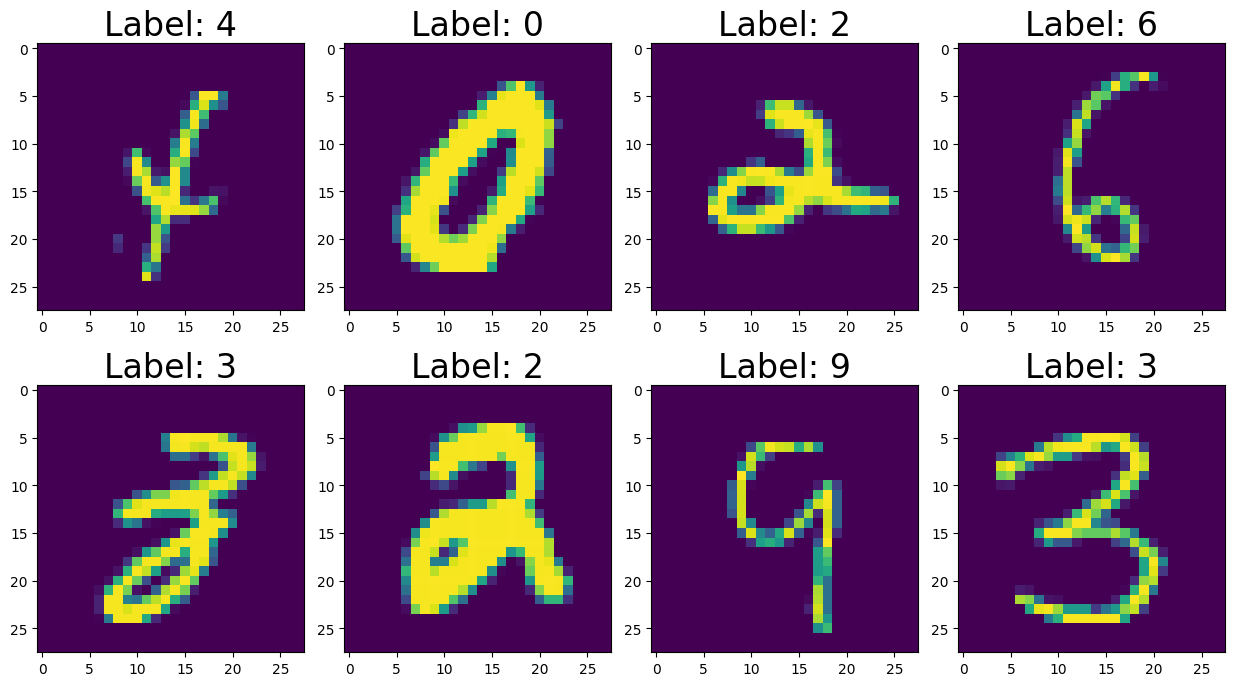

In [6]:
# Plot a few images

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 7.75))
fig.subplots_adjust(top=0.995,
                    bottom=0.115,
                    left=0.005,
                    right=0.995,
                    wspace=0.15,
                    hspace=0.005)

plot_array = (2, 4)
ax = [[None] * plot_array[1]] * plot_array[0]
it = 0
for i in range(plot_array[0]):
    for j in range(plot_array[1]):
        ax[i][j] = plt.subplot2grid((2, 4), (i, j), rowspan=1, colspan=1)
        ax[i][j].imshow(Xtrain[it, :].reshape((28, 28)))
        ax[i][j].set_title(f"Label: {ytrain[it]}", fontsize=24)
        it += 1

In [7]:
# Preprocess the data

import sklearn.preprocessing

print(f"Before preprocessing, train data       : "
      f"min = {np.min(Xtrain):.1f}, "
      f"max = {np.max(Xtrain):.1f}, "
      f"mean = {np.mean(Xtrain):.1f}, "
      f"std = {np.std(Xtrain):.1f}")
print(f"Before preprocessing, validation data : "
      f"min = {np.min(Xval):.1f}, "
      f"max = {np.max(Xval):.1f}, "
      f"mean = {np.mean(Xval):.1f}, "
      f"std = {np.std(Xval):.1f}")
print(f"Before preprocessing, test data       : "
      f"min = {np.min(Xtest):.1f}, "
      f"max = {np.max(Xtest):.1f}, "
      f"mean = {np.mean(Xtest):.1f}, "
      f"std = {np.std(Xtest):.1f}")

scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler.fit(Xtrain)  # Every statistic we compute is found on the training data!

Xtrain = scaler.transform(Xtrain)
Xval = scaler.transform(Xval)
# TODO: If you do cross-validation, you must redo this on the training data in
#       each cross-validation loop, and then transform the validation data as
#       well!
Xtest = scaler.transform(Xtest)

print(f"After preprocessing, train data        : "
      f"min = {np.min(Xtrain):.1f}, "
      f"max = {np.max(Xtrain):.1f}, "
      f"mean = {np.mean(Xtrain):.1f}, "
      f"std = {np.std(Xtrain):.1f}")
print(f"After preprocessing, validation data  : "
      f"min = {np.min(Xval):.1f}, "
      f"max = {np.max(Xval):.1f}, "
      f"mean = {np.mean(Xval):.1f}, "
      f"std = {np.std(Xval):.1f}")
print(f"After preprocessing, test data        : "
      f"min = {np.min(Xtest):.1f}, "
      f"max = {np.max(Xtest):.1f}, "
      f"mean = {np.mean(Xtest):.1f}, "
      f"std = {np.std(Xtest):.1f}")

# TODO: Try to apply other preprocessing, e.g. the
#       sklearn.preprocessing.StandardScaler(), and see if the results improve.

Before preprocessing, train data       : min = 0.0, max = 255.0, mean = 33.4, std = 78.7
Before preprocessing, validation data : min = 0.0, max = 255.0, mean = 33.2, std = 78.5
Before preprocessing, test data       : min = 0.0, max = 255.0, mean = 33.3, std = 78.6
After preprocessing, train data        : min = -1.0, max = 1.0, mean = -0.7, std = 0.6
After preprocessing, validation data  : min = -1.0, max = 31.0, mean = -0.7, std = 0.6
After preprocessing, test data        : min = -1.0, max = 225.0, mean = -0.7, std = 0.6


### The $k$-NN model

If you take the course **5DV124**, then you will have to implement the $k$-NN classifier yourself. The below implementation uses the scikit-learn implementation of the $k$-NN classifier, but you need to do it yourself.

If you take the course **5DV201**, then you can use the $k$-NN classifier from scikit-learn directly. You are of course free to also implement the $k$-NN classifier yourself, if you want to do that.

In both cases, you need to perform a hyper-parameter search for the optimal number of neighbours, $k$.

In [8]:
# Create the k-NN classifier

import sklearn.neighbors
from collections import Counter
if course_5DV124:
    # TODO: Create your own nearest neighbour classifier:
    class KNeighborsClassifier(sklearn.neighbors.KNeighborsClassifier):

        def __init__(self, n_neighbors=5):
            super().__init__(n_neighbors=n_neighbors)
            self.n_neighbors = n_neighbors
        def fit(self, X, y):
            # TODO: You need to implement this yourself.
            # Should manipulate (if needed) and return `self` in your implementation.
            # Note that `self` is the Python-equivalent Java's and JavaScript's `this`,
            # roughly speaking, i.e. it refers to the current instance of your class
            self.X = X
            self.y = y
            return self

        def predict(self, X):
            #to implement
            #1. find distance from the point to other data
            #2. sort them
            #3. find label to k numbers

            #self.X : entire testcase X
            #X : to predict testcase X
            # TODO: You need to implement this yourself.
            # Should manipulate and return the class labels for each datapoint in X
            predict = []
            for i in range(0, len(X)):
              dists = np.linalg.norm(self.X - X[i], axis = 1) #np.linalg.norm is culculating Euclidean distance
              idxs = np.argsort(dists)[:self.n_neighbors] #return sorted array's index
              lables = self.y[idxs]
              cnt = Counter(lables)
              predict.append(cnt.most_common(1)[0][0])
            return predict
else:  # This is used if you take the course 5DV201
    import sklearn.neighbors.KNeighborsClassifier as KNeighborsClassifier

In [9]:
# Perform grid search to find the number of neighbours, K

k_max = 10  # Set the maximum number of neighbours considered

errs_val = []
# TODO: Perform a hyper-parameter search for the parameter k here. Either use
#       the validation dataset, or optionally use cross-validation here.


# TODO: The distance computations may take a long time. Play with different
#       amounts of data here to see what's feasible for you. Get it to work
#       on a small amount of data, and then run for a longer time with more
#       data. You may not be able to use all data with the k-NN method,
#       depending on the computer you have for this.


for i in range(1, k_max):

  k = i
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(Xtrain[:5000, :], ytrain[:5000])
  err = model.score(Xval[:1000, :], yval[:1000])
  print(f"Number of neighbours: k={i}, validation accuracy: {err}")
  errs_val.append(err)
  print("Grid search done!")

Number of neighbours: k=1, validation accuracy: 0.936
Grid search done!
Number of neighbours: k=2, validation accuracy: 0.936
Grid search done!
Number of neighbours: k=3, validation accuracy: 0.949
Grid search done!
Number of neighbours: k=4, validation accuracy: 0.951
Grid search done!
Number of neighbours: k=5, validation accuracy: 0.95
Grid search done!
Number of neighbours: k=6, validation accuracy: 0.95
Grid search done!
Number of neighbours: k=7, validation accuracy: 0.945
Grid search done!
Number of neighbours: k=8, validation accuracy: 0.944
Grid search done!
Number of neighbours: k=9, validation accuracy: 0.943
Grid search done!


Text(0, 0.5, 'Validation Accuracy')

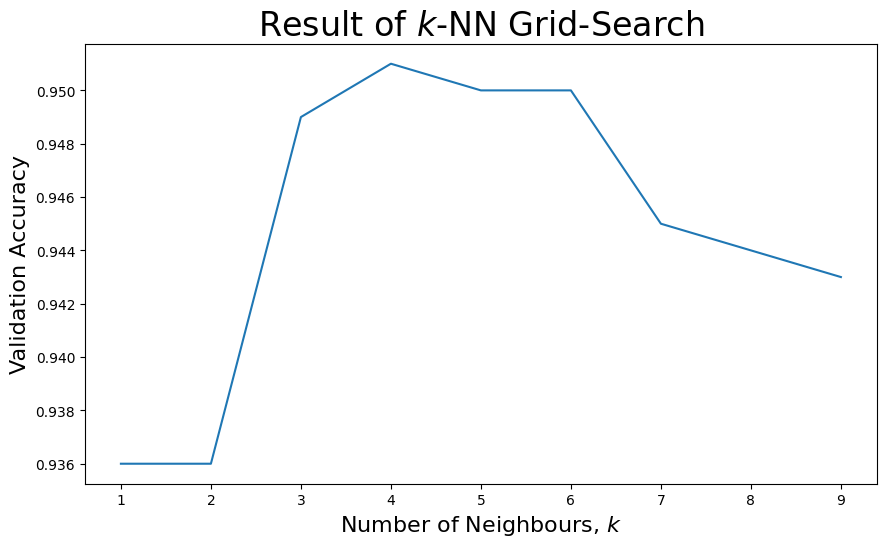

In [ ]:
# Plot the accuracy curve as a function of k

fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(top=0.995,
                    bottom=0.115,
                    left=0.005,
                    right=0.995,
                    wspace=0.15,
                    hspace=0.005)

ax0 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
ax0.plot(range(1, len(errs_val) + 1), errs_val)
ax0.set_title("Result of $k$-NN Grid-Search", fontsize=24)
ax0.set_xlabel("Number of Neighbours, $k$", fontsize=16)
ax0.set_ylabel("Validation Accuracy", fontsize=16)

In [ ]:
# Train the final k-NN model with the best value for k

k_best = np.argmax(errs_val) + 1  # Note that k=1 is at index 0.
print(f"The best value was {errs_val[k_best -1]}, found using k={k_best}.")

model_knn = KNeighborsClassifier(n_neighbors=k_best)
model_knn.fit(Xtrain[:20000, :], ytrain[:20000])
err = model_knn.score(Xval[:10000, :], yval[:10000])
print(f"Final validation accuracy: {err}")

The best value was 0.951, found using k=4.
Final validation accuracy: 0.9617142857142857


### The neural network model

We will use the neural networks (multilayer perceptrons) implemented in scikit-learn. You need to find the optimal number of layers, the number of neurons in each of the layers, and any other hyper-parameters that may be relevant. **Note that you should train the neural network on (approximately) as little data as possible while still achieving the desired result. (Your dataset must not be tens of thousands of entries larger than necessary, given the parameters that you have identified.)**

###1.number of layers

 We compared the validation accuracy with the number of neurons unified at 100 and the number of hidden layers varied from 2 to 6.

In [ ]:
import sklearn.neural_network

errs_val = {}

for i in range (2, 7): #from 2 layers to 6 layers
  default_neurons_size = 100 #same neurons size
  hidden_layer_sizes = []
  while (i > 0):
    i -= 1
    hidden_layer_sizes.append(100)
  model = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='relu',
    alpha=0.0001,
    batch_size='auto',
    learning_rate_init=0.01,
    max_iter=200,
  )

  model.fit(Xtrain[:5000, :], ytrain[:5000]) #1/10 data

  err = model.score(Xval[:1000, :], yval[:1000]) #1/10 data
  print(f"Hidden layer sizes: {hidden_layer_sizes}, "
        f"validation accuracy: {err}")
  errs_val[tuple(hidden_layer_sizes)] = err

  print("Grid search done!")

Hidden layer sizes: [100, 100], validation accuracy: 0.93
Grid search done!
Hidden layer sizes: [100, 100, 100], validation accuracy: 0.918
Grid search done!
Hidden layer sizes: [100, 100, 100, 100], validation accuracy: 0.935
Grid search done!
Hidden layer sizes: [100, 100, 100, 100, 100], validation accuracy: 0.924
Grid search done!
Hidden layer sizes: [100, 100, 100, 100, 100, 100], validation accuracy: 0.919
Grid search done!


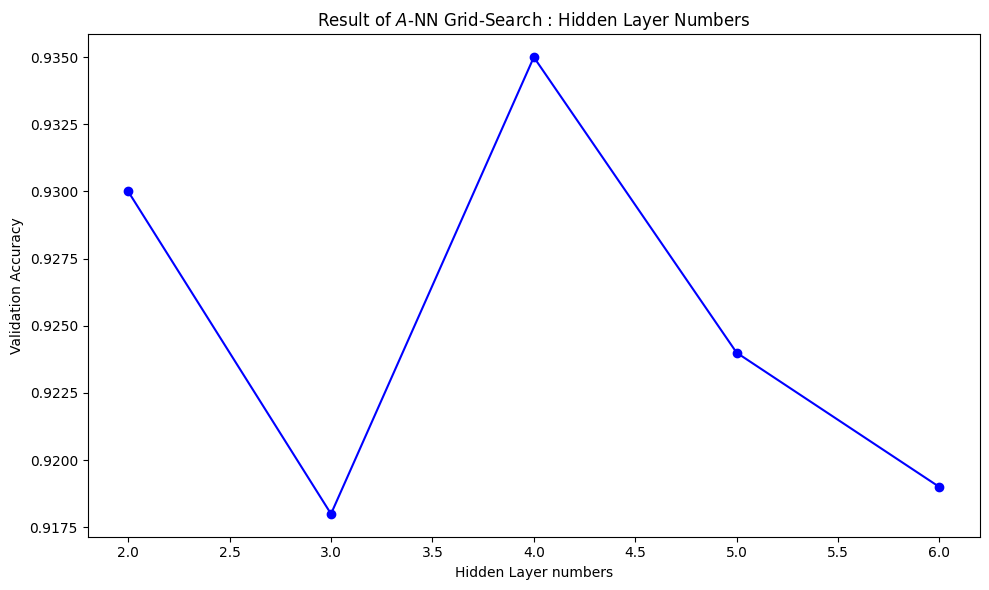

In [ ]:
#to visualize
hidden_layers = [len(key) for key in errs_val.keys()]
accuracies = list(errs_val.values())

plt.figure(figsize=(10, 6))
plt.plot(hidden_layers, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Hidden Layer numbers')
plt.ylabel('Validation Accuracy')
plt.title('Result of $A$-NN Grid-Search : Hidden Layer Numbers')
plt.tight_layout()

plt.show()

###2. number of neurons

We varied the number of neurons based on the number of layers, as previous experiments showed the highest accuracy with 4 layers. First, we set the minimum and maximum number of neurons for each layer. We had a hard time choosing the minimum and maximum values, but in general, CNNs tend to get bigger from the input values and then get smaller as they move to the output layer, so we set them in a similar way. Then, we ran the for loop 10 times and set random values.

In [12]:
import sklearn.neural_network
import random

# Set the maximum and minimum number of neurons for each layer.
hidden_layer_sizes_min = [100, 200, 250, 100]
hidden_layer_sizes_max = [200, 400, 500, 200]

errs_val = {}

for i in range(10):
  seed = i  #Set the random seed for reproducible results
  random.seed(seed)

  num_neurons_1 = random.randint(hidden_layer_sizes_min[0], hidden_layer_sizes_max[0])
  num_neurons_2 = random.randint(hidden_layer_sizes_min[1], hidden_layer_sizes_max[1])
  num_neurons_3 = random.randint(hidden_layer_sizes_min[2], hidden_layer_sizes_max[2])
  num_neurons_4 = random.randint(hidden_layer_sizes_min[3], hidden_layer_sizes_max[3])
  hidden_layer_sizes = (num_neurons_1, num_neurons_2, num_neurons_3, num_neurons_4)
  model = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='relu',
    alpha=0.0001,
    batch_size='auto',
    learning_rate_init=0.01,
    max_iter=200,
  )

  model.fit(Xtrain[:5000, :], ytrain[:5000]) #1/10 data
  err = model.score(Xval[:1000, :], yval[:1000]) #1/10 data
  print(f"Hidden layer sizes: {hidden_layer_sizes}, "
        f"validation accuracy: {err}")
  errs_val[hidden_layer_sizes] = err

  print("Grid search done!")

Hidden layer sizes: (149, 394, 477, 153), validation accuracy: 0.422
Grid search done!
Hidden layer sizes: (117, 345, 466, 197), validation accuracy: 0.794
Grid search done!
Hidden layer sizes: (107, 223, 271, 146), validation accuracy: 0.932
Grid search done!
Hidden layer sizes: (130, 351, 389, 116), validation accuracy: 0.917
Grid search done!
Hidden layer sizes: (130, 277, 276, 192), validation accuracy: 0.855
Grid search done!
Hidden layer sizes: (179, 265, 439, 145), validation accuracy: 0.926
Grid search done!
Hidden layer sizes: (173, 220, 374, 197), validation accuracy: 0.937
Grid search done!
Hidden layer sizes: (141, 238, 351, 183), validation accuracy: 0.913
Grid search done!
Hidden layer sizes: (129, 294, 496, 148), validation accuracy: 0.87
Grid search done!
Hidden layer sizes: (159, 356, 345, 134), validation accuracy: 0.881
Grid search done!


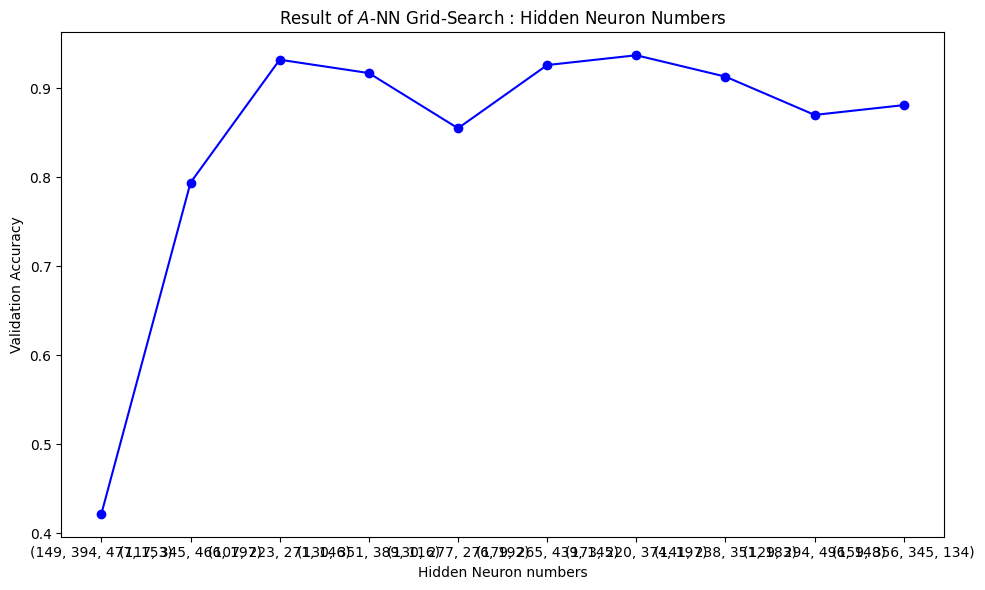

In [14]:
#to visualize
hidden_layers = [str(key) for key in errs_val.keys()]
accuracies = list(errs_val.values())

plt.figure(figsize=(10, 6))
plt.plot(hidden_layers, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Hidden Neuron numbers')
plt.ylabel('Validation Accuracy')
plt.title('Result of $A$-NN Grid-Search : Hidden Neuron Numbers')
plt.tight_layout()

plt.show()

###3. learning rate

MLPClassifier automatically gradually decreases from learning_rate_init to gradually decrease as it approaches the lowest point. We compared the results by decreasing the initial value by an exponential factor from 0.1 to 0.0001.

In [15]:
import sklearn.neural_network

errs_val_lr = {}

for i in [0.1, 0.01, 0.001, 0.0001]: #set learning rate

  num_neurons_1 = 173
  num_neurons_2 = 220
  num_neurons_3 = 374
  num_neurons_4 = 197
  hidden_layer_sizes = (num_neurons_1, num_neurons_2, num_neurons_3, num_neurons_4)
  model = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='relu',
    alpha=0.0001,
    batch_size='auto',
    learning_rate_init=i,
    max_iter=200,
  )

  model.fit(Xtrain[:5000, :], ytrain[:5000]) #1/10 data
  err = model.score(Xval[:1000, :], yval[:1000]) #1/10 data
  print(f"learning_rate: i, "
        f"validation accuracy: {err}")
  errs_val_lr[i] = err

  print("Grid search done!")

learning_rate: i, validation accuracy: 0.098
Grid search done!
learning_rate: i, validation accuracy: 0.935
Grid search done!
learning_rate: i, validation accuracy: 0.96
Grid search done!
learning_rate: i, validation accuracy: 0.95
Grid search done!


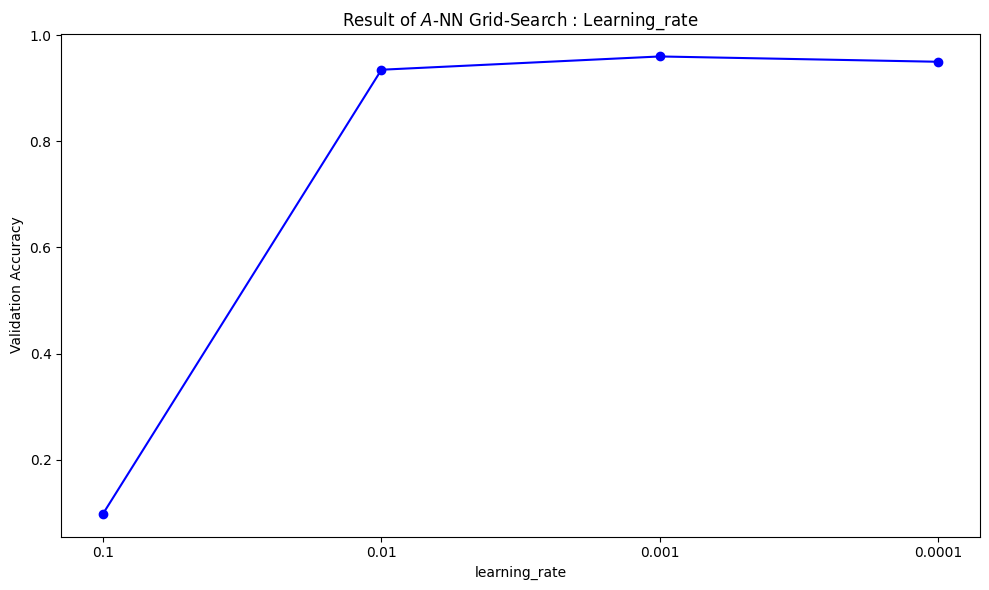

In [17]:
#to visualize
learning_rate = [str(key) for key in errs_val_lr.keys()]
accuracies = list(errs_val_lr.values())

plt.figure(figsize=(10, 6))
plt.plot(learning_rate, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('learning_rate')
plt.ylabel('Validation Accuracy')
plt.title('Result of $A$-NN Grid-Search : Learning_rate')
plt.tight_layout()

plt.show()

###4. number of epochs

In [ ]:
import sklearn.neural_network
import numpy as np

num_neurons_1 = 141
num_neurons_2 = 238
num_neurons_3 = 351
num_neurons_4 = 183
hidden_layer_sizes = (num_neurons_1, num_neurons_2, num_neurons_3, num_neurons_4)
model = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='relu',
    alpha=0.0001,
    batch_size='auto',
    learning_rate_init=0.001,
    max_iter=1,  # 1 epoch
)

# save accuracy and loss for each epoch
accuracies = []
losses = []

# set number of epochs
num_epochs = 300

for epoch in range(num_epochs):
    # partially train (to avoid stopping training)
    model.partial_fit(Xtrain[:5000], ytrain[:5000], classes=np.unique(ytrain))

    # save
    accuracy = model.score(Xval[:1000], yval[:1000])
    loss = model.loss_
    accuracies.append(accuracy)
    losses.append(loss)



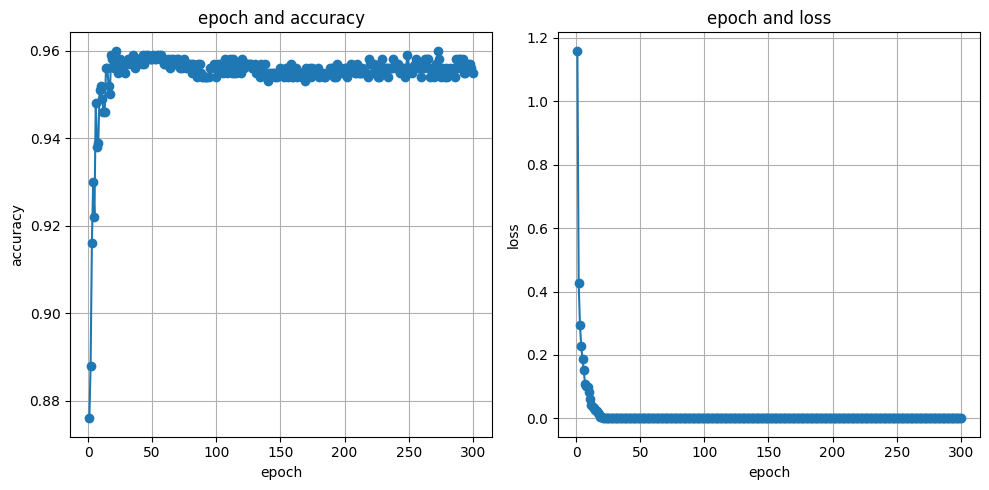

In [ ]:
import matplotlib.pyplot as plt

# plot
epochs = list(range(1, num_epochs + 1))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracies, marker='o', linestyle='-')
plt.title('epoch and accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, losses, marker='o', linestyle='-')
plt.title('epoch and loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
# Train the final model using the best layer sizes

hidden_layer_sizes_best = max(errs_val, key=errs_val.get, default='')
print(f"The best value was {errs_val[hidden_layer_sizes_best]}, "
      f"found using layer sizes: {hidden_layer_sizes_best}.")
learning_rate_best = max(errs_val_lr, key=errs_val_lr.get, default='')
print(f"The best value was {errs_val_lr[learning_rate_best]}, "
      f"found using learning rate: {learning_rate_best}.")

model_ann = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_best,
    alpha=0.0001,
    batch_size='auto',
    learning_rate_init=learning_rate_best,
    max_iter=200,
)

model_ann.fit(Xtrain[:15000, :], ytrain[:15000])
err = model_ann.score(Xval[:3000, :], yval[:3000])

print(f"Final validation accuracy: {err}")

The best value was 0.937, found using layer sizes: (173, 220, 374, 197).
The best value was 0.96, found using learning rate: 0.001.
Final validation accuracy: 0.972


Once we have selected our final model, we can compute the test error on the final models as the last thing we do. Make sure to only do this at the very end, after you have selected the best models you can find.

In [ ]:
print(f"k-NN model training data accuracy  : {model_knn.score(Xtrain, ytrain)}")
print(f"k-NN model validation data accuracy: {model_knn.score(Xval, yval)}")
if True:  # Change this to True as the very last thing you do!
    print(f"k-NN model test data accuracy      : "
          f"{model_knn.score(Xtest, ytest)}")

k-NN model training data accuracy  : 0.9721714285714286
k-NN model validation data accuracy: 0.9617142857142857
k-NN model test data accuracy      : 0.9649142857142857


In [19]:
# Evaluate the final model on all the data sets, including the test data. We
# only evaluate the test data once, and as the last thing we do. If you train
# another model after this, based on the performance on the test data, then your
# test data is effectively a validation dataset, and you no longer have a test
# dataset. (Or, if you keep your test data set, then your results are biased and
# by that unreliable.)
print(f"ANN model training data accuracy   : {model_ann.score(Xtrain, ytrain)}")
print(f"ANN model validation data accuracy : {model_ann.score(Xval, yval)}")
if True:  # Change this to True as the very last thing you do!
    print(f"ANN model test data accuracy       : "
          f"{model_ann.score(Xtest, ytest)}")

ANN model training data accuracy   : 0.9808761904761905
ANN model validation data accuracy : 0.9712
ANN model test data accuracy       : 0.9706285714285714
